### Principal Component Analysis (``PCA``)

Principal component analysis (``PCA``) is a linear dimensionality reduction technique with applications in exploratory data analysis, visualization and data preprocessing. 

The data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.

The principal components of a collection of points in a real coordinate space are a sequence of $p$ unit vectors, where the $i$-th vector is the direction of a line that best fits the data while being orthogonal to the first $i − 1$ vectors. Here, a best-fitting line is defined as one that minimizes the average squared perpendicular distance from the points to the line. These directions (i.e., principal components) constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. 

Many studies use the first two principal components in order to plot the data in two dimensions and to visually identify clusters of closely related data points

``Benchmarks``

``(1) Binary-Trees / Recursion``

* ``Time`` : total duration of execution (from start to end`of the processus)
* ``CPU time`` : time during CPU was actively working for the program
* ``Memory`` : memory use by the program during its execution

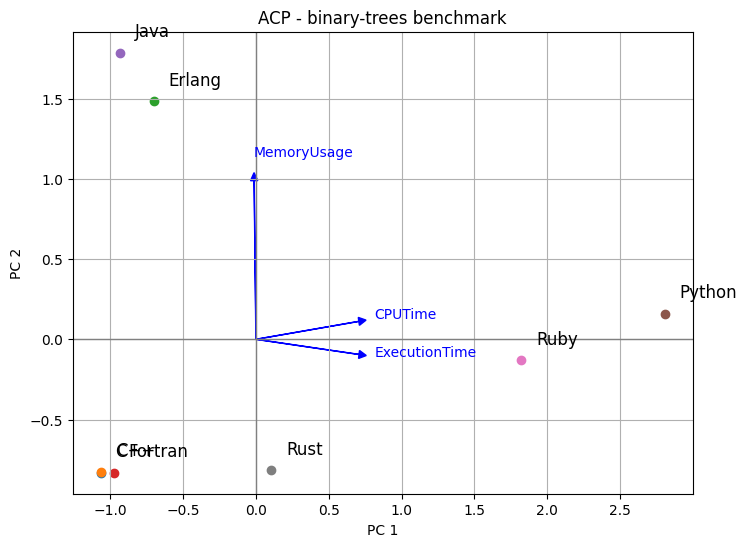

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Language': ['C', 'C++', 'Erlang', 'Fortran', 'Java', 'Python', 'Ruby', 'Rust'],
    'ExecutionTime': [5.00, 5.00, 7.01, 6.00, 2.00, 37.02, 29.02, 15.01],
    'CPUTime': [4.82, 4.85, 9.22, 5.27, 10.25, 36.86, 28.59, 14.15],
    'MemoryUsage': [132044.0, 133796.0, 1089692.0, 133056.0, 1195120.0, 518392.0, 405064.0, 132804.0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Standardize the data
features = ['ExecutionTime', 'CPUTime', 'MemoryUsage']
X = df.loc[:, features].values
X = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalDf['Language'] = df['Language']

# Calculate the PCA loadings
pca_loadings = pca.components_.T

# Plot the PCA results
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the projection of the languages onto the principal components
for i, txt in enumerate(principalDf['Language']):
    ax.scatter(principalDf['PC1'][i], principalDf['PC2'][i])
    ax.text(principalDf['PC1'][i] + 0.1, principalDf['PC2'][i] + 0.1, txt, fontsize=12)

# Plot the PCA loadings (arrows) for each original variable
for i in range(len(pca_loadings)):
    ax.arrow(0, 0, pca_loadings[i, 0], pca_loadings[i, 1], head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    plt.text(pca_loadings[i, 0]* 1.15, pca_loadings[i, 1] * 1.15, features[i], color='blue')

# Set up the graph with labels and grid
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('PCA - binary-trees benchmark')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)

# Show the plot
plt.show()

``Results for Binary-Trees``

PCA shows us the different paradigm between langages. Each paradigm offers trade-offs between execution time, CPU usage, and memory consumption. The choice of language for a project might depend on the specific needs.

**Procedural**: They show competitive execution and CPU times, with C being slightly faster but both maintaining moderate memory usage. Procedural languages are known for their close-to-hardware execution efficiency.

**Object-Oriented**: Java has the fastest execution time (``2.00sec``) but at the cost of high CPU and memory usage, while C++ balances resource usage and performance. Object-oriented languages offer encapsulation and modularity which might add some overhead.

**Functional**: Despite higher execution and CPU times, Erlang's functional nature is designed for concurrency and might not excel in single-threaded binary tree operations.

**Scripting**: Python and Ruby. Both languages exhibit higher execution times and CPU usage, which is typical for scripting languages prioritizing ease of use and development speed over raw performance.

**Systems Programming**: Rust shows a balanced profile, with moderate execution time and resource usage, reflecting its focus on performance while ensuring memory safety.

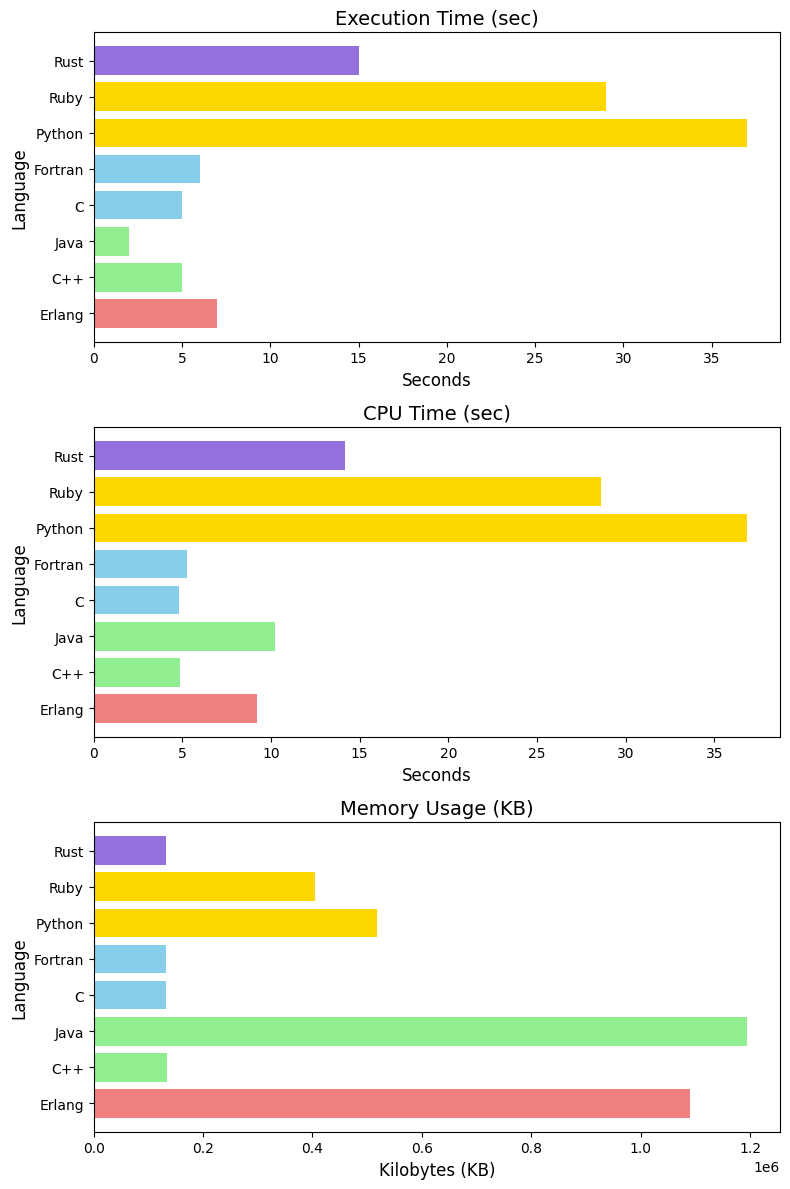

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Language': ['C', 'C++', 'Erlang', 'Fortran', 'Java', 'Python', 'Ruby', 'Rust'],
    'Time': [5.00, 5.00, 7.01, 6.00, 2.00, 37.02, 29.02, 15.01],
    'CPUTime': [4.82, 4.85, 9.22, 5.27, 10.25, 36.86, 28.59, 14.15],
    'Memory': [132044.0, 133796.0, 1089692.0, 133056.0, 1195120.0, 518392.0, 405064.0, 132804.0],
    'Paradigm': ['Procedural', 'Object-Oriented', 'Functional', 'Procedural',
                 'Object-Oriented', 'Scripting', 'Scripting', 'Systems Programming']
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='Paradigm')
fig, axs = plt.subplots(3, 1, figsize=(8, 12)) 
colors = {'Procedural': 'skyblue', 'Object-Oriented': 'lightgreen', 'Functional': 'lightcoral',
          'Scripting': 'gold', 'Systems Programming': 'mediumpurple'}

# Plotting
# Execution Time
axs[0].barh(df_sorted['Language'], df_sorted['Time'], color=[colors[par] for par in df_sorted['Paradigm']])
axs[0].set_title('Execution Time (sec)', fontsize=14)
axs[0].set_xlabel('Seconds', fontsize=12)
axs[0].set_ylabel('Language', fontsize=12)

# CPU Time
axs[1].barh(df_sorted['Language'], df_sorted['CPUTime'], color=[colors[par] for par in df_sorted['Paradigm']])
axs[1].set_title('CPU Time (sec)', fontsize=14)
axs[1].set_xlabel('Seconds', fontsize=12)
axs[1].set_ylabel('Language', fontsize=12)

# Memory Usage
axs[2].barh(df_sorted['Language'], df_sorted['Memory'], color=[colors[par] for par in df_sorted['Paradigm']])
axs[2].set_title('Memory Usage (KB)', fontsize=14)
axs[2].set_xlabel('Kilobytes (KB)', fontsize=12)
axs[2].set_ylabel('Language', fontsize=12)

plt.tight_layout()
plt.show()


``(2) Sort (Bubble sort)``

* ``Time`` : total duration of execution (from start to end`of the processus)
* ``CPU time`` : time during CPU was actively working for the program
* ``Memory`` : memory use by the program during its execution

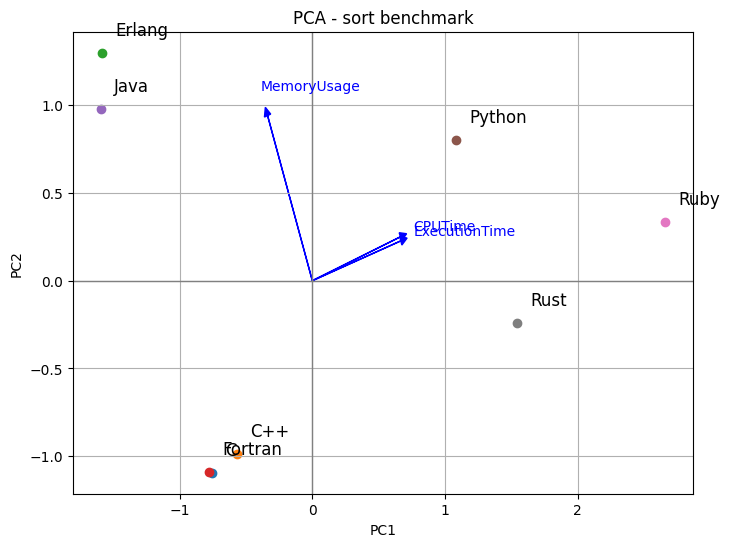

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# New data provided by the user
data = {
    'Language': ['C', 'C++', 'Erlang', 'Fortran', 'Java', 'Python', 'Ruby', 'Rust'],
    'ExecutionTime': [31.01, 64.03, 23.01, 27.01, 16.01, 410.18, 621.27, 422.19],
    'CPUTime': [30.29, 63.70, 46.32, 26.55, 16.63, 409.57, 621.05, 421.99],
    'MemoryUsage': [1264.0, 4040.0, 190388.0, 2408.0, 168268.0, 88164.0, 15624.0, 3244.0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Standardize the data
features = ['ExecutionTime', 'CPUTime', 'MemoryUsage']
X = df.loc[:, features].values
X = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalDf['Language'] = df['Language']

pca_loadings = pca.components_.T

fig, ax = plt.subplots(figsize=(8, 6))

for i, txt in enumerate(principalDf['Language']):
    ax.scatter(principalDf['PC1'][i], principalDf['PC2'][i])
    ax.text(principalDf['PC1'][i] + 0.1, principalDf['PC2'][i] + 0.1, txt, fontsize=12)

for i in range(len(pca_loadings)):
    ax.arrow(0, 0, pca_loadings[i, 0], pca_loadings[i, 1], head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    plt.text(pca_loadings[i, 0]* 1.15, pca_loadings[i, 1] * 1.15, features[i], color='blue')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA - sort benchmark')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)

# Show the plot
plt.show()

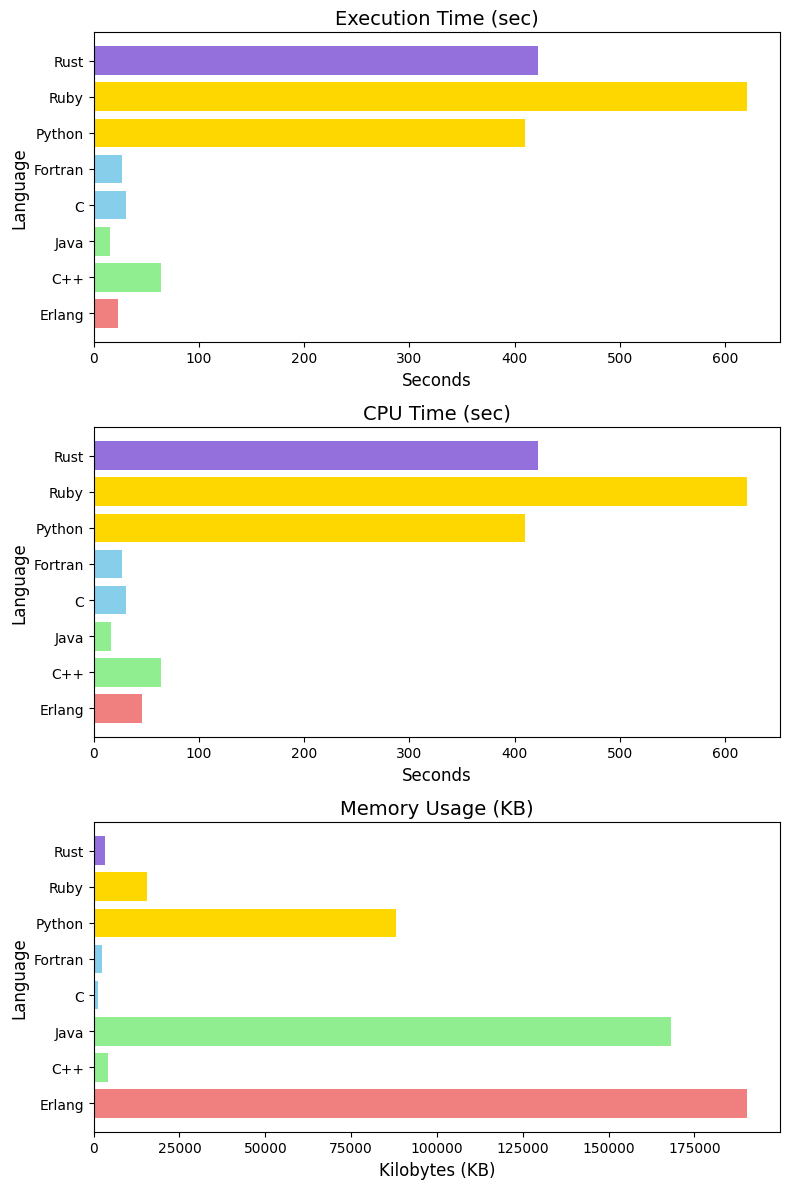

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Language': ['C', 'C++', 'Erlang', 'Fortran', 'Java', 'Python', 'Ruby', 'Rust'],
    'Time': [31.01, 64.03, 23.01, 27.01, 16.01, 410.18, 621.27, 422.19],
    'CPUTime': [30.29, 63.70, 46.32, 26.55, 16.63, 409.57, 621.05, 421.99],
    'Memory': [1264.0, 4040.0, 190388.0, 2408.0, 168268.0, 88164.0, 15624.0, 3244.0],
    'Paradigm': ['Procedural', 'Object-Oriented', 'Functional', 'Procedural',
                 'Object-Oriented', 'Scripting', 'Scripting', 'Systems Programming']
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='Paradigm')
fig, axs = plt.subplots(3, 1, figsize=(8, 12)) 
colors = {'Procedural': 'skyblue', 'Object-Oriented': 'lightgreen', 'Functional': 'lightcoral',
          'Scripting': 'gold', 'Systems Programming': 'mediumpurple'}

# Plotting 
# Execution Time
axs[0].barh(df_sorted['Language'], df_sorted['Time'], color=[colors[par] for par in df_sorted['Paradigm']])
axs[0].set_title('Execution Time (sec)', fontsize=14)
axs[0].set_xlabel('Seconds', fontsize=12)
axs[0].set_ylabel('Language', fontsize=12)

# CPU Time
axs[1].barh(df_sorted['Language'], df_sorted['CPUTime'], color=[colors[par] for par in df_sorted['Paradigm']])
axs[1].set_title('CPU Time (sec)', fontsize=14)
axs[1].set_xlabel('Seconds', fontsize=12)
axs[1].set_ylabel('Language', fontsize=12)

# Memory Usage
axs[2].barh(df_sorted['Language'], df_sorted['Memory'], color=[colors[par] for par in df_sorted['Paradigm']])
axs[2].set_title('Memory Usage (KB)', fontsize=14)
axs[2].set_xlabel('Kilobytes (KB)', fontsize=12)
axs[2].set_ylabel('Language', fontsize=12)

plt.tight_layout()
plt.show()

``(3) Fibonacci``

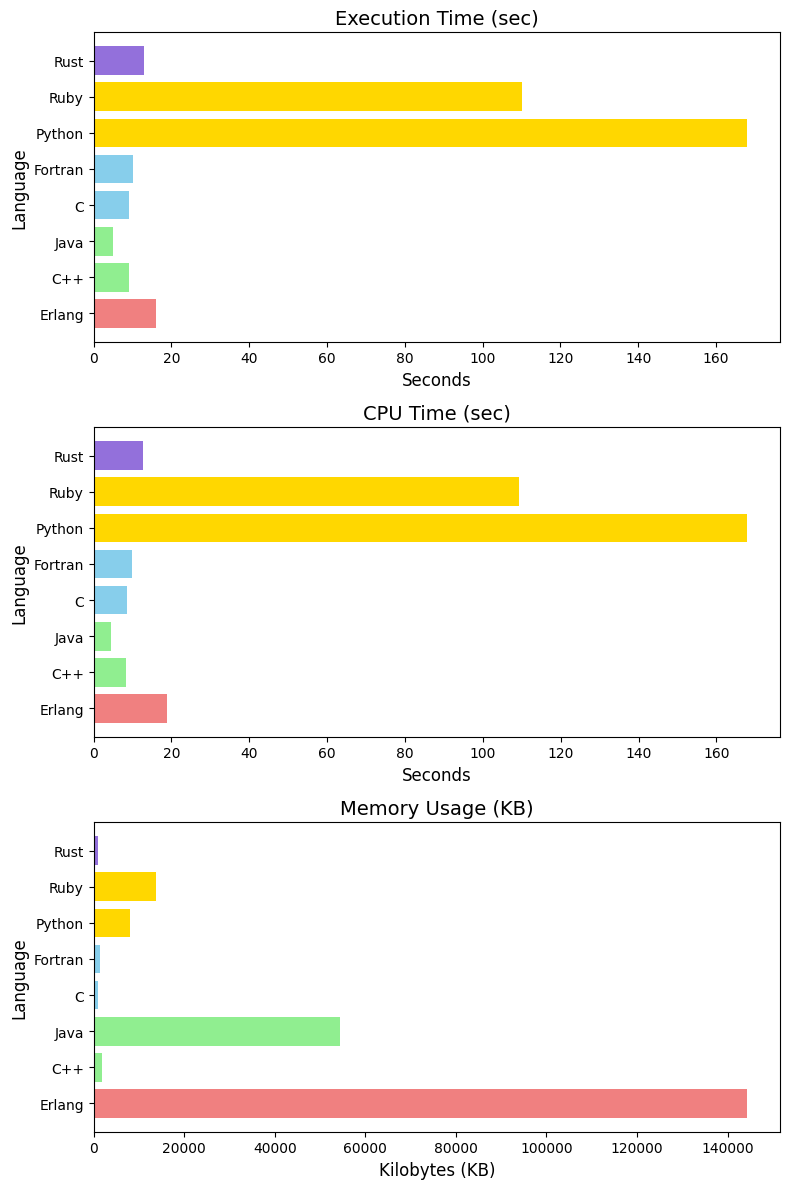

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data_updated = {
    'Language': ['C', 'C++', 'Erlang', 'Fortran', 'Java', 'Python', 'Ruby', 'Rust'],
    'Time': [9.00, 9.00, 16.01, 10.01, 5.00, 168.07, 110.04, 13.01],
    'CPUTime': [8.57, 8.38, 18.85, 9.98, 4.36, 167.94, 109.39, 12.60],
    'Memory': [904.0, 1900.0, 144356.0, 1376.0, 54392.0, 7956.0, 13808.0, 988.0],
    'Paradigm': ['Procedural', 'Object-Oriented', 'Functional', 'Procedural',
                 'Object-Oriented', 'Scripting', 'Scripting', 'Systems Programming']
}

df_updated = pd.DataFrame(data_updated)
df_sorted_updated = df_updated.sort_values(by='Paradigm')

colors = {'Procedural': 'skyblue', 'Object-Oriented': 'lightgreen', 'Functional': 'lightcoral',
          'Scripting': 'gold', 'Systems Programming': 'mediumpurple'}

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].barh(df_sorted_updated['Language'], df_sorted_updated['Time'], color=[colors[par] for par in df_sorted_updated['Paradigm']])
axs[0].set_title('Execution Time (sec)', fontsize=14)
axs[0].set_xlabel('Seconds', fontsize=12)
axs[0].set_ylabel('Language', fontsize=12)

axs[1].barh(df_sorted_updated['Language'], df_sorted_updated['CPUTime'], color=[colors[par] for par in df_sorted_updated['Paradigm']])
axs[1].set_title('CPU Time (sec)', fontsize=14)
axs[1].set_xlabel('Seconds', fontsize=12)
axs[1].set_ylabel('Language', fontsize=12)

axs[2].barh(df_sorted_updated['Language'], df_sorted_updated['Memory'], color=[colors[par] for par in df_sorted_updated['Paradigm']])
axs[2].set_title('Memory Usage (KB)', fontsize=14)
axs[2].set_xlabel('Kilobytes (KB)', fontsize=12)
axs[2].set_ylabel('Language', fontsize=12)

plt.tight_layout()
plt.show()
